<a href="https://colab.research.google.com/github/juanmed/dw_a/blob/main/package_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pytesseract

In [4]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,733 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [15]:
!sudo apt install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,050 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-kor all 4.00~git24-0e00fe6-1.2 [1,050 kB]
Fetched 1,050 kB in 1s (710 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-kor.
(Reading da

In [21]:
!sudo apt install tesseract-ocr-script-hang

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-script-hang
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,854 kB of archives.
After this operation, 4,861 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-script-hang all 4.00~git24-0e00fe6-1.2 [1,854 kB]
Fetched 1,854 kB in 1s (1,460 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-oc

In [29]:
!pip install scipy


In [30]:
!pip install imutils

In [90]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract
import imutils
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_local

In [23]:
!which tesseract

/usr/bin/tesseract


In [24]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

Dimensiones:  (1104, 1440, 3)
STEP 1: Edge Detection


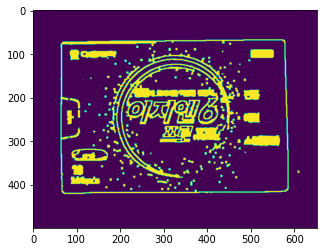

In [148]:
image = cv2.imread('images7.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#print(pytesseract.image_to_string(image, lang='Hangul', config='-psm 1'))
#plt.imshow(image)
or_h, or_w, or_d = image.shape
print("Dimensiones: ", image.shape)
an_h = 500.0
ratio = image.shape[0] / an_h
orig = image.copy()
image = imutils.resize(image, height = int(an_h))

# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
kernel = np.ones((3,3),np.uint8)  
edged = cv2.dilate(edged, kernel, iterations = 2)
edged = cv2.erode(edged, kernel, iterations = 1)

# show the original image and the edge detected image
print("STEP 1: Edge Detection")
plt.imshow(edged)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

STEP 2: Find contours of paper


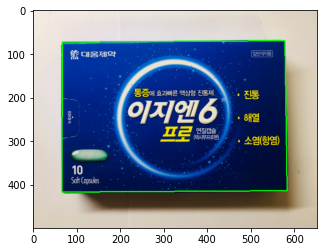

In [149]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
# loop over the contours
approx = cv2.approxPolyDP(cnts[0], 0.02 * peri, True)

for c in cnts[0:0]:
  # approximate the contour
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02 * peri, True)
  # if our approximated contour has four points, then we
  # can assume that we have found our screen
  cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
  #if len(approx) == 4:
  #  screenCnt = approx
  #  break
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
#print(approx)
plt.imshow(image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

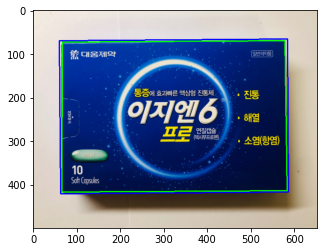

In [150]:
rect = cv2.minAreaRect(cnts[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image,[box],0,(0,0,255),2)
plt.imshow(image)

STEP 3: Apply perspective transform


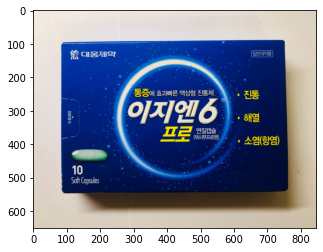

In [151]:
warped = four_point_transform(orig, box.reshape(4, 2) * ratio)
#warped = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)
#T = threshold_local(warped, 11, offset = 10, method = "gaussian")
#warped = (warped > T).astype("uint8") * 255

# show the original and scanned images
print("STEP 3: Apply perspective transform")
plt.imshow(imutils.resize(orig, height = 650))


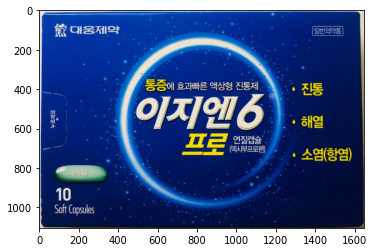

In [152]:
plt.imshow(imutils.resize(warped, height = or_h))

In [153]:
print(pytesseract.image_to_string(imutils.resize(warped, height = or_h), lang='Hangul', config='-psm 11'))

통 증 에 효 과 빠른 액 상 형 진

(9796

년 0522 매 (.

   

0! 0,
Soft Capsules ' ' no j

